STEP 1: LOADING DATA
Loading: sub-NDARAA396TWZ_task-DespicableMe_eeg.set
Loading: sub-NDARAC688ZM5_task-DespicableMe_eeg.set


C:\Users\JINQI\AppData\Local\Temp\ipykernel_45556\1315177551.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(full_path, preload=True)
C:\Users\JINQI\AppData\Local\Temp\ipykernel_45556\1315177551.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(full_path, preload=True)


Loading: sub-NDARAC923GPW_task-DespicableMe_eeg.set
Loading: sub-NDARAD256AHU_task-DespicableMe_eeg.set
Data loaded: 106518 samples, 129 channels
Sampling rate: 500.0 Hz
Duration: 213.03 seconds

STEP 2: INITIAL DATA INSPECTION
Close the plot window to continue...


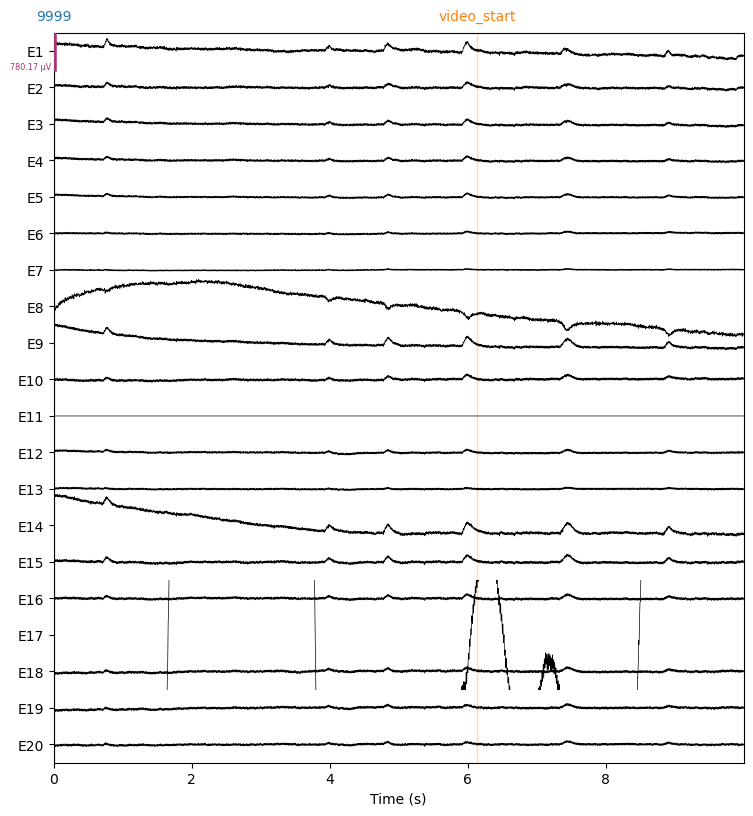


STEP 3: APPLYING FILTERS
Applying 60 Hz notch filter...
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 3301 samples (6.602 s)

Applying 1-40 Hz bandpass filter...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00


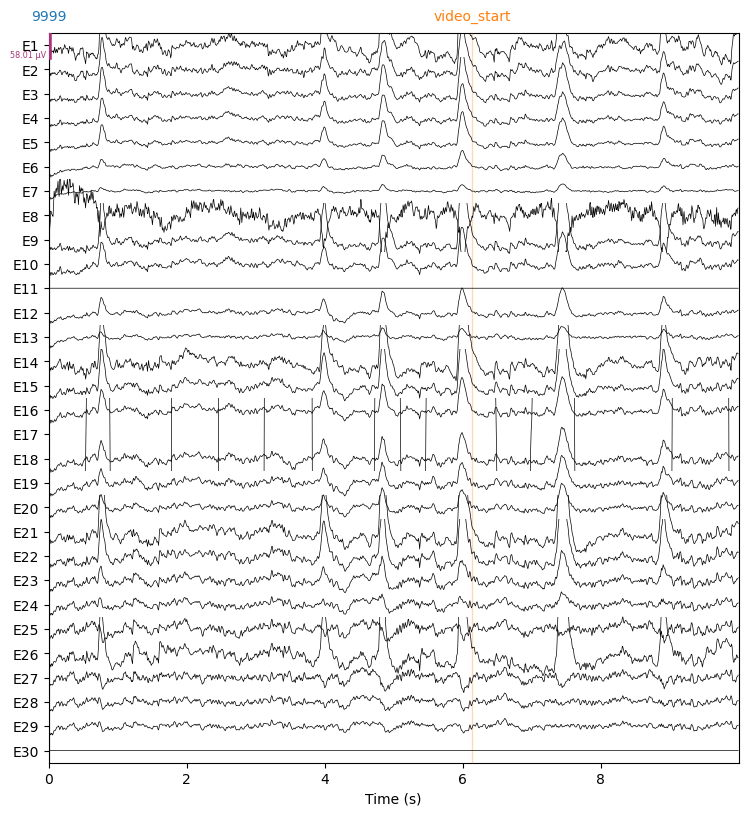


No bad channels marked.

No bad channels to interpolate.

STEP 6: SETTING AVERAGE REFERENCE
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Reference set to average!

STEP 7: SAVING PRE-ICA STATE
Creating copy of filtered data before ICA for comparison...
Copy created!

STEP 8: ARTIFACT REJECTION (OPTIONAL)
Checking for extreme amplitude artifacts...
Max peak-to-peak amplitude: 510320.4 µV
Threshold: 10108.3 µV
⚠️  Warning: Very high amplitude artifacts detected!
   Consider manually rejecting bad segments before ICA.

STEP 9: RUNNING ICA
Running ICA with 20 components...
Fitting ICA to data using 129 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whit

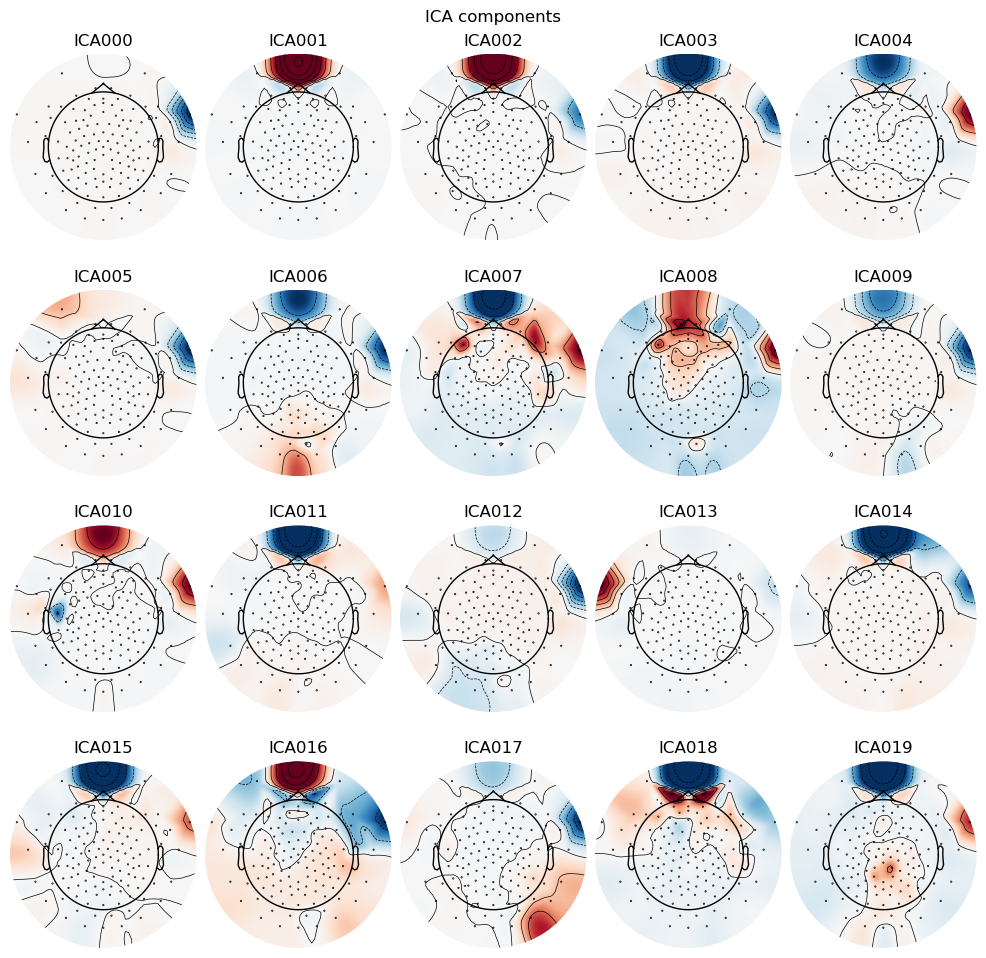


Showing component time courses...
Close window to continue...
    Applying projection operator with 1 vector (pre-whitener application)
Creating RawArray with float64 data, n_channels=20, n_times=106518
    Range : 0 ... 106517 =      0.000 ...   213.034 secs
Ready.


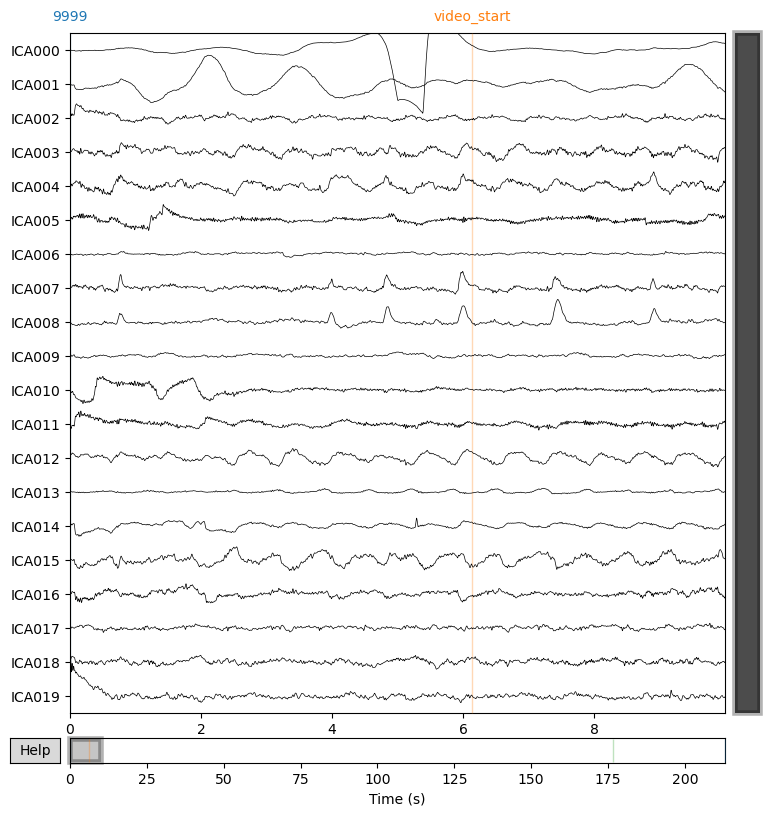


------------------------------------------------------------
AUTOMATIC ARTIFACT DETECTION:
------------------------------------------------------------
Automatic EOG detection not available (no EOG channels)
    Applying projection operator with 1 vector (pre-whitener application)

Components explaining >5% variance: [1, 2, 7, 13, 16, 18]
  Component 1: 6.6%
  Component 2: 11.5%
  Component 7: 22.7%
  Component 13: 5.3%
  Component 16: 8.3%
  Component 18: 6.7%
(These might be artifacts if they're not brain activity)

STEP 11: EXCLUDE ARTIFACT COMPONENTS

📋 TIPS FOR IDENTIFYING ARTIFACTS:
------------------------------------------------------------
EXCLUDE (artifacts):
  ✓ Frontal topography (Fp1, Fp2) + regular spikes = eye blinks
  ✓ Lateral frontal (F7, F8) + slow drifts = eye movements
  ✓ High frequency + temporal = muscle artifacts
  ✓ Single bad channel = electrode artifact

KEEP (brain activity):
  ✓ Posterior (O1, O2) + 8-13 Hz oscillations = alpha rhythm
  ✓ Frontal/central 

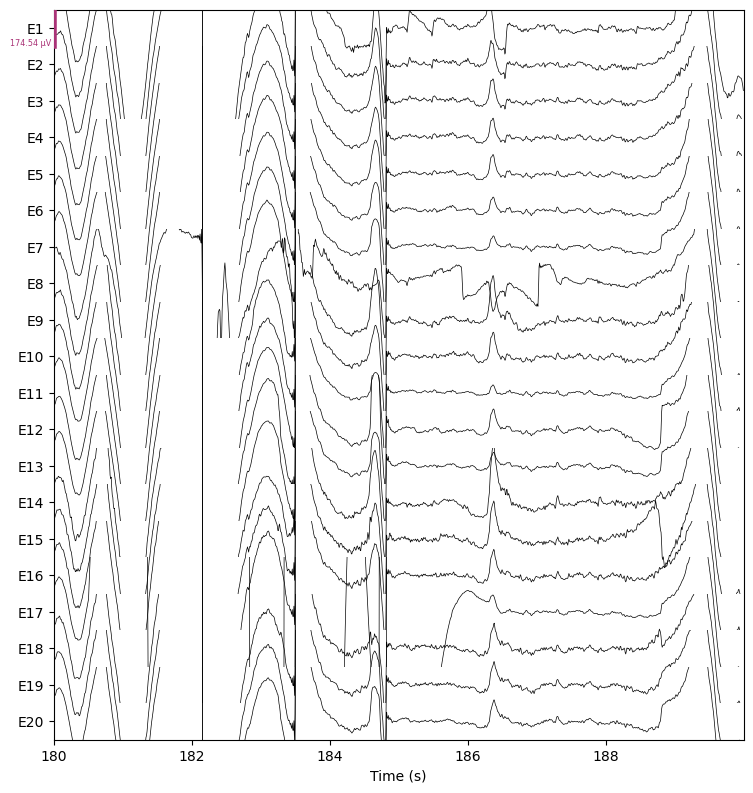

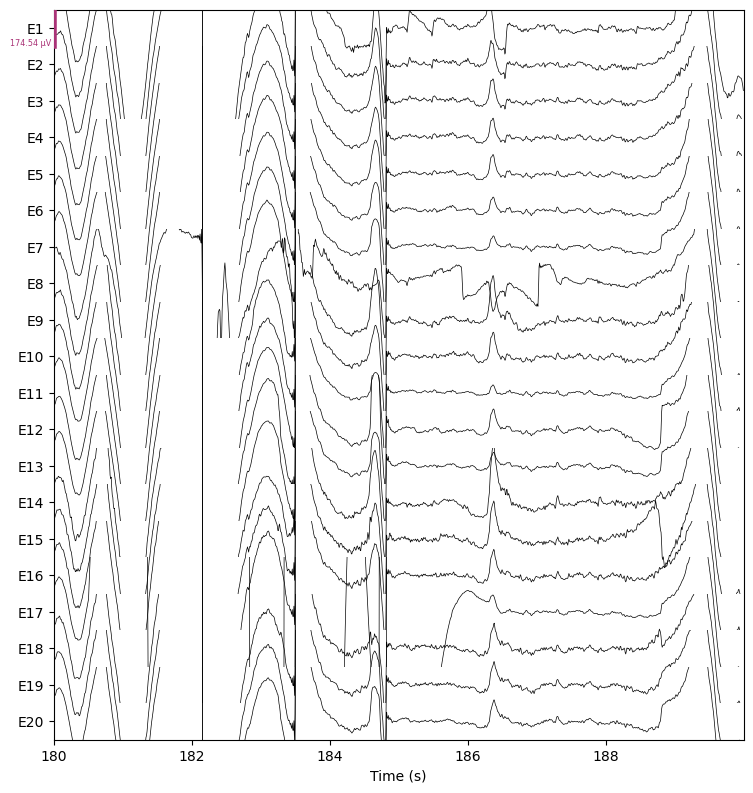


STEP 15: SAVE CLEANED DATA
Overwriting existing file.
Writing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\processed\sub-NDARAA396TWZ_task-DespicableMe_eeg_clean.fif
Overwriting existing file.
Closing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\processed\sub-NDARAA396TWZ_task-DespicableMe_eeg_clean.fif
[done]
Cleaned data saved to: processed\sub-NDARAA396TWZ_task-DespicableMe_eeg_clean.fif
Overwriting existing file.
Writing ICA solution to c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\processed\sub-NDARAA396TWZ_task-DespicableMe_eeg_ica.fif...
Overwriting existing file.
ICA solution saved to: processed\sub-NDARAA396TWZ_task-DespicableMe_eeg_ica.fif

PREPROCESSING COMPLETE!
Channels processed: 129
ICA components removed: 0
Final data duration: 213.03 seconds

Summary of what was removed:
  - No components were removed


C:\Users\JINQI\AppData\Local\Temp\ipykernel_45556\1315177551.py:400: RuntimeWarning: This filename (c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\processed\sub-NDARAA396TWZ_task-DespicableMe_eeg_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_path, overwrite=True)


In [24]:
import mne
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# STEP 1: LOAD DATA
# ============================================================================
print("=" * 60)
print("STEP 1: LOADING DATA")
print("=" * 60)

raw_data = []
raw_dir = os.path.join('..', '..', 'raw')

file_name = 'DespicableMe'  # enter filename, no index
pattern = rf"^sub-[A-Za-z0-9]+_task-{file_name}_eeg\.set$"

for fname in os.listdir(raw_dir):
    if re.match(pattern, fname):
        full_path = os.path.join(raw_dir, fname)
        print(f"Loading: {fname}")
        raw = mne.io.read_raw_eeglab(full_path, preload=True)
        raw_data.append(raw)

if not raw_data:
    raise ValueError(f"No files found matching pattern: {pattern}")

raw = raw_data[0]
print(f"Data loaded: {raw.n_times} samples, {len(raw.ch_names)} channels")
print(f"Sampling rate: {raw.info['sfreq']} Hz")
print(f"Duration: {raw.times[-1]:.2f} seconds")

# ============================================================================
# STEP 2: INITIAL INSPECTION (BEFORE FILTERING)
# ============================================================================
print("\n" + "=" * 60)
print("STEP 2: INITIAL DATA INSPECTION")
print("=" * 60)
print("Close the plot window to continue...")

fig1 = raw.plot(n_channels=20, scalings='auto', title="Raw Data (Unfiltered)", 
                block=True, show_scrollbars=False)

# ============================================================================
# STEP 3: APPLY FILTERS
# ============================================================================
print("\n" + "=" * 60)
print("STEP 3: APPLYING FILTERS")
print("=" * 60)

# Notch filter for line noise (60 Hz in US, 50 Hz in Europe)
print("Applying 60 Hz notch filter...")
raw.notch_filter(freqs=[60], fir_design='firwin')

# Bandpass filter (1-40 Hz is standard for EEG)
print("Applying 1-40 Hz bandpass filter...")
raw.filter(1., 40., fir_design='firwin')

print("Filtering complete!")

# ============================================================================
# STEP 4: INSPECT FILTERED DATA & MARK BAD CHANNELS
# ============================================================================
print("\n" + "=" * 60)
print("STEP 4: MARK BAD CHANNELS")
print("=" * 60)
print("Instructions:")
print("  - Look at the plot and identify bad channels")
print("  - Look for: flatlines, excessive noise, or disconnected channels")
print("  - Note the channel names (e.g., E17, E52)")
print("  - You'll enter them in a moment")
print("-" * 60)

fig2 = raw.plot(n_channels=30, scalings='auto', 
                title="Filtered Data - Identify Bad Channels",
                block=True, show_scrollbars=False)

# Manually mark bad channels
print("\n" + "=" * 60)
bad_channels_input = input("Enter bad channel names (comma-separated, e.g., E17,E52,E103) or press Enter if none: ")

if bad_channels_input.strip():
    raw.info['bads'] = [ch.strip() for ch in bad_channels_input.split(',')]
    print(f"Bad channels marked: {raw.info['bads']}")
else:
    print("No bad channels marked.")
    raw.info['bads'] = []

# ============================================================================
# STEP 5: INTERPOLATE BAD CHANNELS
# ============================================================================
if raw.info['bads']:
    print("\n" + "=" * 60)
    print("STEP 5: INTERPOLATING BAD CHANNELS")
    print("=" * 60)
    print(f"Interpolating {len(raw.info['bads'])} bad channels...")
    raw.interpolate_bads(reset_bads=True)
    print("Interpolation complete!")
else:
    print("\nNo bad channels to interpolate.")

# ============================================================================
# STEP 6: SET REFERENCE
# ============================================================================
print("\n" + "=" * 60)
print("STEP 6: SETTING AVERAGE REFERENCE")
print("=" * 60)
raw.set_eeg_reference('average', projection=True)
raw.apply_proj()
print("Reference set to average!")

# ============================================================================
# STEP 7: CREATE COPY BEFORE ICA (for comparison)
# ============================================================================
print("\n" + "=" * 60)
print("STEP 7: SAVING PRE-ICA STATE")
print("=" * 60)
print("Creating copy of filtered data before ICA for comparison...")
raw_before_ica = raw.copy()
print("Copy created!")

# ============================================================================
# STEP 8: OPTIONAL - REMOVE EXTREME ARTIFACTS
# ============================================================================
print("\n" + "=" * 60)
print("STEP 8: ARTIFACT REJECTION (OPTIONAL)")
print("=" * 60)
print("Checking for extreme amplitude artifacts...")

# Calculate peak-to-peak amplitudes
data = raw.get_data()
ptp = np.ptp(data, axis=1)
threshold = np.percentile(ptp, 95) * 2

print(f"Max peak-to-peak amplitude: {ptp.max() * 1e6:.1f} µV")
print(f"Threshold: {threshold * 1e6:.1f} µV")

if ptp.max() > threshold:
    print("⚠️  Warning: Very high amplitude artifacts detected!")
    print("   Consider manually rejecting bad segments before ICA.")

# ============================================================================
# STEP 9: RUN ICA
# ============================================================================
print("\n" + "=" * 60)
print("STEP 9: RUNNING ICA")
print("=" * 60)

# Determine number of components (typically 15-20 for good decomposition)
n_components = min(20, len(raw.ch_names) - 1)
print(f"Running ICA with {n_components} components...")

ica = ICA(n_components=n_components, random_state=97, max_iter='auto',
          method='infomax')

# Fit ICA (this may take a minute)
ica.fit(raw)
print("ICA fitting complete!")

# ============================================================================
# STEP 10: VISUALIZE ICA COMPONENTS
# ============================================================================
print("\n" + "=" * 60)
print("STEP 10: INSPECT ICA COMPONENTS")
print("=" * 60)
print("Instructions:")
print("  - Look for components with:")
print("    • Eye blinks: frontal topography, regular pattern")
print("    • Eye movements: lateral frontal, slow drifts")
print("    • Muscle artifacts: high frequency, temporal/frontal")
print("    • Heartbeat: regular peaks, can be anywhere")
print("  - Note the component numbers to exclude")
print("-" * 60)

# Plot component topographies
fig3 = ica.plot_components(inst=raw, show=False)
plt.show(block=True)

# Plot component time courses
print("\nShowing component time courses...")
print("Close window to continue...")
fig4 = ica.plot_sources(raw, show=False, start=0, stop=10)
plt.show(block=True)

# Optional: Try automatic artifact detection
print("\n" + "-" * 60)
print("AUTOMATIC ARTIFACT DETECTION:")
print("-" * 60)

# Try to detect eye blinks automatically (if you have EOG channels)
try:
    eog_indices, eog_scores = ica.find_bads_eog(raw, threshold=3.0)
    if eog_indices:
        print(f"Automatically detected EOG components: {eog_indices}")
        print(f"Scores: {[f'{s:.2f}' for s in eog_scores[eog_indices]]}")
    else:
        print("No clear EOG components detected automatically")
except:
    print("Automatic EOG detection not available (no EOG channels)")
    
# Check for high variance components (often artifacts)
try:
    # Get variance explained by each component
    sources = ica.get_sources(raw).get_data()
    # Calculate variance of each component
    component_var = np.var(sources, axis=1)
    # Normalize to percentages
    total_var = np.sum(component_var)
    component_var_pct = (component_var / total_var) * 100
    
    # Find components explaining >5% of variance
    high_var_components = [i for i, var in enumerate(component_var_pct) if var > 5.0]
    print(f"\nComponents explaining >5% variance: {high_var_components}")
    for i in high_var_components:
        print(f"  Component {i}: {component_var_pct[i]:.1f}%")
    print("(These might be artifacts if they're not brain activity)")
except Exception as e:
    print(f"\nCouldn't calculate component variance: {e}")

# ============================================================================
# STEP 11: EXCLUDE COMPONENTS
# ============================================================================
print("\n" + "=" * 60)
print("STEP 11: EXCLUDE ARTIFACT COMPONENTS")
print("=" * 60)

print("\n📋 TIPS FOR IDENTIFYING ARTIFACTS:")
print("-" * 60)
print("EXCLUDE (artifacts):")
print("  ✓ Frontal topography (Fp1, Fp2) + regular spikes = eye blinks")
print("  ✓ Lateral frontal (F7, F8) + slow drifts = eye movements")
print("  ✓ High frequency + temporal = muscle artifacts")
print("  ✓ Single bad channel = electrode artifact")
print("\nKEEP (brain activity):")
print("  ✓ Posterior (O1, O2) + 8-13 Hz oscillations = alpha rhythm")
print("  ✓ Frontal/central + 4-8 Hz = theta rhythm")
print("  ✓ Diffuse topography + continuous activity = brain signals")
print("  ✓ High variance + brain-like pattern = important neural activity")
print("-" * 60)

# Manually set components to exclude
# Update these based on your visual inspection
components_to_exclude = input("\nEnter component numbers to exclude (comma-separated, e.g., 0,2,5) or press Enter to skip: ")

if components_to_exclude.strip():
    ica.exclude = [int(x.strip()) for x in components_to_exclude.split(',')]
    print(f"Components to exclude: {ica.exclude}")
    
    # Show what these components look like
    print("\nShowing detailed properties of the components you selected...")
    print("Check if these really look like artifacts!")
    if len(ica.exclude) > 0:
        fig_excluded = ica.plot_properties(raw, picks=ica.exclude, show=False)
        plt.show(block=True)
        
        # Ask for confirmation
        print("\n" + "=" * 60)
        confirm = input("Do these components look like artifacts? (y/n): ")
        if confirm.lower() != 'y':
            print("Let's reconsider...")
            new_components = input("Enter NEW component numbers to exclude (or press Enter to cancel): ")
            if new_components.strip():
                ica.exclude = [int(x.strip()) for x in new_components.split(',')]
                print(f"Updated exclusions: {ica.exclude}")
            else:
                ica.exclude = []
                print("No components will be excluded.")
else:
    print("No components excluded.")
    ica.exclude = []

# ============================================================================
# STEP 12: APPLY ICA
# ============================================================================
print("\n" + "=" * 60)
print("STEP 12: APPLYING ICA")
print("=" * 60)

if not ica.exclude:
    print("⚠️  WARNING: No components are marked for exclusion!")
    print("   ICA will not change your data.")
    print("   The before/after plots will be IDENTICAL.")
    proceed = input("\nDo you want to go back and exclude components? (y/n): ")
    if proceed.lower() == 'y':
        print("\nRe-run the script and exclude components in Step 11.")
        raise SystemExit("Stopping to allow component exclusion.")

# Apply ICA to the raw data (modifies in place)
print(f"Removing {len(ica.exclude)} component(s): {ica.exclude}")
ica.apply(raw)
print("ICA applied successfully!")

# Verify that data actually changed
if ica.exclude:
    data_before = raw_before_ica.get_data()
    data_after = raw.get_data()
    difference = np.sum(np.abs(data_before - data_after))
    
    if difference < 1e-10:
        print("\n⚠️  WARNING: Data appears unchanged after ICA!")
        print("   This shouldn't happen. Check your component exclusions.")
    else:
        print(f"✓ Data successfully modified (total absolute change: {difference:.2e})")
        
        # Calculate signal-to-noise improvement
        # Check if variance decreased (should decrease if removing artifacts)
        var_before = np.var(data_before)
        var_after = np.var(data_after)
        var_change = ((var_after - var_before) / var_before) * 100
        
        print(f"\nData quality assessment:")
        print(f"  Variance before ICA: {var_before:.2e}")
        print(f"  Variance after ICA: {var_after:.2e}")
        print(f"  Change: {var_change:+.2f}%")
        
        if var_change > 10:
            print("\n  ⚠️  WARNING: Variance INCREASED significantly!")
            print("     You may have removed important brain signals.")
            print("     Consider excluding fewer components.")
        elif var_change < -10:
            print("\n  ✓ Variance decreased - likely removed artifacts successfully.")
        else:
            print("\n  → Minor change in variance - check overlay plot to verify.")

# ============================================================================
# STEP 13: COMPARE BEFORE/AFTER
# ============================================================================
print("\n" + "=" * 60)
print("STEP 13: COMPARE BEFORE/AFTER ICA")
print("=" * 60)
print("Comparing data before and after ICA...")
print("TIP: Look at the same time window in both plots to see differences")

if not ica.exclude:
    print("\n⚠️  WARNING: No components were excluded!")
    print("   The before/after plots will look identical.")
    print("   Consider re-running and excluding artifact components.")

# Find a time window with visible artifacts for better comparison
print("\nSearching for time window with artifacts...")
data_for_search = raw_before_ica.get_data()
# Look for high variance windows (likely to have artifacts)
window_size = int(5 * raw_before_ica.info['sfreq'])  # 5 second windows
variances = []
for i in range(0, data_for_search.shape[1] - window_size, window_size):
    var = np.var(data_for_search[:, i:i+window_size])
    variances.append((i / raw_before_ica.info['sfreq'], var))

# Sort by variance and pick a high-variance window
variances.sort(key=lambda x: x[1], reverse=True)
artifact_time = variances[0][0] if variances else 0
print(f"Showing time window starting at {artifact_time:.1f} seconds (likely has artifacts)")

# Plot BEFORE ICA (the copy we made) - starting at artifact window
fig5 = raw_before_ica.plot(n_channels=20, scalings='auto', 
                            title="BEFORE ICA Cleaning (Filtered Only)",
                            start=artifact_time,
                            show_scrollbars=False, block=False)

# Plot AFTER ICA (the modified raw) - same time window
fig6 = raw.plot(n_channels=20, scalings='auto',
                title="AFTER ICA Cleaning (Artifacts Removed)",
                start=artifact_time,
                show_scrollbars=False, block=True)

# ============================================================================
# STEP 14: VISUALIZE REMOVED COMPONENTS
# ============================================================================
if ica.exclude:
    print("\n" + "=" * 60)
    print("STEP 14: VISUALIZE WHAT WAS REMOVED")
    print("=" * 60)
    print("Showing the artifact components that were removed...")
    
    # Show what was removed
    fig7 = ica.plot_overlay(raw_before_ica, exclude=ica.exclude, 
                            title="ICA Artifact Removal Overlay")
    plt.show(block=True)

# ============================================================================
# STEP 15: SAVE CLEANED DATA
# ============================================================================
print("\n" + "=" * 60)
print("STEP 15: SAVE CLEANED DATA")
print("=" * 60)

save_choice = input("Save cleaned data? (y/n): ")

if save_choice.lower() == 'y':
    output_dir = 'processed'
    os.makedirs(output_dir, exist_ok=True)
    
    # Generate output filename
    original_fname = os.path.basename(raw.filenames[0])
    output_fname = original_fname.replace('.set', '_clean.fif')
    output_path = os.path.join(output_dir, output_fname)
    
    raw.save(output_path, overwrite=True)
    print(f"Cleaned data saved to: {output_path}")
    
    # Also save ICA solution
    ica_fname = original_fname.replace('.set', '_ica.fif')
    ica_path = os.path.join(output_dir, ica_fname)
    ica.save(ica_path, overwrite=True)
    print(f"ICA solution saved to: {ica_path}")
else:
    print("Data not saved.")

print("\n" + "=" * 60)
print("PREPROCESSING COMPLETE!")
print("=" * 60)
print(f"Channels processed: {len(raw.ch_names)}")
print(f"ICA components removed: {len(ica.exclude)}")
print(f"Final data duration: {raw.times[-1]:.2f} seconds")
print("\nSummary of what was removed:")
if ica.exclude:
    print(f"  - Component(s) {ica.exclude} were identified as artifacts and removed")
else:
    print("  - No components were removed")